In [38]:
#Dependencies
import csv
import numpy as np
import pandas as pd
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

In [39]:
#Prepare data to load into df
data_to_load = "spreadspoke_scores.csv"

In [40]:
#load data into dataframe
scores_df = pd.read_csv(data_to_load)
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [41]:
#Update old home team names
scores_df['team_home'] = np.where(scores_df['team_home'] == "Tennessee Oilers", "Tennessee Titans", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "Houston Oilers", "Tennessee Titans", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "Baltimore Colts", "Indianapolis Colts", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "San Diego Chargers", "Los Angeles Chargers", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "Phoenix Cardinals", "Arizona Cardinals", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "St. Louis Cardinals", "Arizona Cardinals", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "Los Angeles Raiders", "Las Vegas Raiders", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "Oakland Raiders", "Las Vegas Raiders", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "St. Louis Rams", "Los Angeles Rams", scores_df['team_home'])
scores_df['team_home'] = np.where(scores_df['team_home'] == "Boston Patriots", "New England Patriots", scores_df['team_home'])

#Update old away team names
scores_df['team_away'] = np.where(scores_df['team_away'] == "Tennessee Oilers", "Tennessee Titans", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "Houston Oilers", "Tennessee Titans", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "Baltimore Colts", "Indianapolis Colts", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "San Diego Chargers", "Los Angeles Chargers", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "Phoenix Cardinals", "Arizona Cardinals", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "St. Louis Cardinals", "Arizona Cardinals", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "Los Angeles Raiders", "Las Vegas Raiders", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "Oakland Raiders", "Las Vegas Raiders", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "St. Louis Rams", "Los Angeles Rams", scores_df['team_away'])
scores_df['team_away'] = np.where(scores_df['team_away'] == "Boston Patriots", "New England Patriots", scores_df['team_away'])


In [42]:
scores_df['team_home'].unique()

array(['Miami Dolphins', 'Tennessee Titans', 'Los Angeles Chargers',
       'Green Bay Packers', 'Atlanta Falcons', 'Buffalo Bills',
       'Detroit Lions', 'Pittsburgh Steelers', 'San Francisco 49ers',
       'Arizona Cardinals', 'Washington Redskins', 'Los Angeles Rams',
       'Cleveland Browns', 'Dallas Cowboys', 'Denver Broncos',
       'Minnesota Vikings', 'New York Jets', 'Las Vegas Raiders',
       'Philadelphia Eagles', 'Indianapolis Colts',
       'New England Patriots', 'Kansas City Chiefs', 'New York Giants',
       'Chicago Bears', 'New Orleans Saints', 'Cincinnati Bengals',
       'Seattle Seahawks', 'Tampa Bay Buccaneers', 'Jacksonville Jaguars',
       'Carolina Panthers', 'Baltimore Ravens', 'Houston Texans'],
      dtype=object)

In [43]:
#Create labels dataframe
labels_df = pd.DataFrame({'team_home':['Green Bay Packers', 'Indianapolis Colts', 'Kansas City Chiefs',
       'Dallas Cowboys', 'Miami Dolphins', 'Minnesota Vikings',
       'Tampa Bay Buccaneers', 'Atlanta Falcons', 'Pittsburgh Steelers',
       'Los Angeles Rams', 'New England Patriots', 'Buffalo Bills',
       'Chicago Bears', 'Denver Broncos', 'New Orleans Saints',
       'New York Jets', 'Philadelphia Eagles', 'Seattle Seahawks',
       'Arizona Cardinals', 'Washington Redskins', 'Detroit Lions',
       'New York Giants', 'Los Angeles Chargers', 'San Francisco 49ers',
       'Cincinnati Bengals', 'Cleveland Browns', 'Tennessee Titans',
       'Las Vegas Raiders', 'Jacksonville Jaguars', 'Carolina Panthers',
       'Baltimore Ravens', 'Houston Texans'],'home_label':['GB','IND','KC','DAL','MIA','MIN','TB','ATL','PIT','LAR','NE','BUF',
                                                     'CHI','DEN','NO','NYJ','PHI','SEA','ARI','WAS','DET','NYG',
                                                     'LAC','SF','CIN','CLE','TEN','LV','JAX','CAR','BAL','HOU']})

#Create labels dataframe
labels_df_away = pd.DataFrame({'team_away':['Green Bay Packers', 'Indianapolis Colts', 'Kansas City Chiefs',
       'Dallas Cowboys', 'Miami Dolphins', 'Minnesota Vikings',
       'Tampa Bay Buccaneers', 'Atlanta Falcons', 'Pittsburgh Steelers',
       'Los Angeles Rams', 'New England Patriots', 'Buffalo Bills',
       'Chicago Bears', 'Denver Broncos', 'New Orleans Saints',
       'New York Jets', 'Philadelphia Eagles', 'Seattle Seahawks',
       'Arizona Cardinals', 'Washington Redskins', 'Detroit Lions',
       'New York Giants', 'Los Angeles Chargers', 'San Francisco 49ers',
       'Cincinnati Bengals', 'Cleveland Browns', 'Tennessee Titans',
       'Las Vegas Raiders', 'Jacksonville Jaguars', 'Carolina Panthers',
       'Baltimore Ravens', 'Houston Texans'],'away_label':['GB','IND','KC','DAL','MIA','MIN','TB','ATL','PIT','LAR','NE','BUF',
                                                     'CHI','DEN','NO','NYJ','PHI','SEA','ARI','WAS','DET','NYG',
                                                     'LAC','SF','CIN','CLE','TEN','LV','JAX','CAR','BAL','HOU']})

In [44]:
# Combine the data into a single dataset
scores_df = pd.merge(scores_df, labels_df, how="left", on=["team_home", "team_home"])
scores_df = pd.merge(scores_df, labels_df_away, how="left", on=["team_away", "team_away"])
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_label,away_label
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Las Vegas Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN,MIA,LV
1,09/03/1966,1966,1,False,Tennessee Titans,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN,TEN,DEN
2,09/04/1966,1966,1,False,Los Angeles Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN,LAC,BUF
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN,MIA,NYJ
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Indianapolis Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN,GB,IND


In [45]:
# Get the average points scored by home and away
home_points = scores_df.groupby(["team_home"]).mean()["score_home"]
away_points = scores_df.groupby(['team_away']).mean()['score_away']
#convert home and away points to dataframes
home_points_df = pd.DataFrame(home_points)
away_points_df = pd.DataFrame(away_points)

In [46]:
#sort values 
home_points_df = home_points_df.sort_values(by='score_home')
away_points_df = away_points_df.sort_values(by='score_away')

In [47]:
home_points_df

,score_home
team_home,
Tampa Bay Buccaneers,19.051282
Cleveland Browns,19.410000
Chicago Bears,20.348837
New York Giants,21.032634
Arizona Cardinals,21.045346
New York Jets,21.064286
Buffalo Bills,21.112412
Jacksonville Jaguars,21.254902
Philadelphia Eagles,21.347032


In [48]:
away_points_df

,score_away
team_away,
Tampa Bay Buccaneers,17.218130
Chicago Bears,17.524823
Arizona Cardinals,17.990566
Detroit Lions,18.030516
Cleveland Browns,18.438903
Buffalo Bills,18.493023
Atlanta Falcons,18.611628
Cincinnati Bengals,18.697561
New York Giants,18.810185


In [49]:
#Join home and away
team_points_df = pd.merge(home_points_df, away_points_df, left_index=True, right_index=True)
team_points_df['team_home'] = team_points_df.index
team_points_df = pd.merge(team_points_df, labels_df, on=["team_home", "team_home"])
team_points_df.head()

,score_home,score_away,team_home,home_label
0,19.051282,17.218130,Tampa Bay Buccaneers,TB
1,19.410000,18.438903,Cleveland Browns,CLE
2,20.348837,17.524823,Chicago Bears,CHI
3,21.032634,18.810185,New York Giants,NYG
4,21.045346,17.990566,Arizona Cardinals,ARI


In [50]:
# Build the scatter plots for teams' points at home and away.
#plt.scatter(home_points_df, away_points_df)

# Incorporate the other graph properties
#plt.title("NFL Points Scored", fontsize=20)
#plt.ylabel("Points Away", fontsize=12)
#plt.xlabel("Points at Home", fontsize=12)
#plt.grid(True)


# Label points with team 
import plotly.graph_objects as go

layout = dict(plot_bgcolor='white', xaxis=dict(title='Score Home', linecolor='#d9d9d9', mirror=True),
              yaxis=dict(title='Score Away', linecolor='#d9d9d9', mirror=True))

data = go.Scatter(x=team_points_df['score_home'],
                  y=team_points_df['score_away'],
                  text=team_points_df['home_label'],
                  mode='markers+text',
                  marker=dict(color='rgba(48, 217, 189, 1)'),
                  name='points away')

fig = go.Figure(data=data, layout=layout)
fig.show()

In [51]:
scores_df.columns.to_list()

['schedule_date',
 'schedule_season',
 'schedule_week',
 'schedule_playoff',
 'team_home',
 'score_home',
 'score_away',
 'team_away',
 'team_favorite_id',
 'spread_favorite',
 'over_under_line',
 'stadium',
 'stadium_neutral',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'weather_detail',
 'home_label',
 'away_label']

In [52]:
scores_df = scores_df[scores_df['team_favorite_id'].notna()]
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_label,away_label
170,01/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90,NaN,GB,KC
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Las Vegas Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74,NaN,GB,LV
538,01/12/1969,1968,Superbowl,True,Indianapolis Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80,NaN,IND,NYJ
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84,NaN,KC,MIN
916,01/17/1971,1970,Superbowl,True,Indianapolis Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60,NaN,IND,DAL


In [53]:
# inserting new column with values of list made above         
scores_df.insert(scores_df.columns.get_loc('team_favorite_id'), "winner",0) 

In [54]:
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,winner,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_label,away_label
170,01/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,0,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90,NaN,GB,KC
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Las Vegas Raiders,0,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74,NaN,GB,LV
538,01/12/1969,1968,Superbowl,True,Indianapolis Colts,7,16,New York Jets,0,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80,NaN,IND,NYJ
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,0,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84,NaN,KC,MIN
916,01/17/1971,1970,Superbowl,True,Indianapolis Colts,16,13,Dallas Cowboys,0,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60,NaN,IND,DAL


In [55]:
#Create winner column
scores_df['winner'] = np.where(scores_df['score_home'] > scores_df['score_away'], scores_df['team_home'], scores_df['team_away'])

#check for ties
scores_df['winner'] = np.where(scores_df['score_home'] == scores_df['score_away'], "tie", scores_df['winner'])

In [56]:
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,winner,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_label,away_label
170,01/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,Green Bay Packers,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90,NaN,GB,KC
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Las Vegas Raiders,Green Bay Packers,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74,NaN,GB,LV
538,01/12/1969,1968,Superbowl,True,Indianapolis Colts,7,16,New York Jets,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80,NaN,IND,NYJ
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,Kansas City Chiefs,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84,NaN,KC,MIN
916,01/17/1971,1970,Superbowl,True,Indianapolis Colts,16,13,Dallas Cowboys,Indianapolis Colts,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60,NaN,IND,DAL


In [57]:
scores_df['winner'].unique()

array(['Green Bay Packers', 'New York Jets', 'Kansas City Chiefs',
       'Indianapolis Colts', 'Dallas Cowboys', 'Miami Dolphins',
       'Pittsburgh Steelers', 'Las Vegas Raiders', 'New York Giants',
       'Atlanta Falcons', 'Tennessee Titans', 'Los Angeles Rams',
       'Tampa Bay Buccaneers', 'Chicago Bears', 'Denver Broncos',
       'Minnesota Vikings', 'Cleveland Browns', 'Philadelphia Eagles',
       'Los Angeles Chargers', 'Buffalo Bills', 'Washington Redskins',
       'New England Patriots', 'Arizona Cardinals', 'Seattle Seahawks',
       'Detroit Lions', 'New Orleans Saints', 'Cincinnati Bengals',
       'San Francisco 49ers', 'tie', 'Jacksonville Jaguars',
       'Carolina Panthers', 'Baltimore Ravens', 'Houston Texans'],
      dtype=object)

In [58]:
#Count number of wins for each team
team_wins = scores_df

In [59]:
team_wins = scores_df.groupby(['winner']).count()['team_home']
team_wins.head()

winner
Arizona Cardinals    267
Atlanta Falcons      308
Baltimore Ravens     229
Buffalo Bills        327
Carolina Panthers    204
Name: team_home, dtype: int64

In [60]:
#convert to df
team_wins_df = pd.DataFrame(team_wins)
#sort values 
team_wins_df = team_wins_df.sort_values(by='team_home')
team_wins_df.columns = ['number of wins']
team_wins_df

,number of wins
winner,
tie,22
Houston Texans,135
Jacksonville Jaguars,183
Carolina Panthers,204
Baltimore Ravens,229
Cleveland Browns,234
Detroit Lions,256
Tampa Bay Buccaneers,264
Arizona Cardinals,267


<BarContainer object of 33 artists>

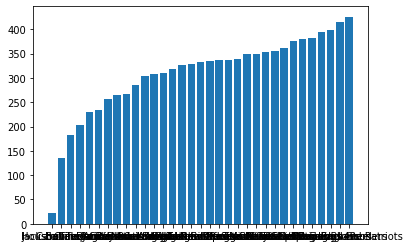

In [68]:
x_axis = team_wins_df.index
y_axis = team_wins_df['number of wins']
plt.bar(x_axis,y_axis)